In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Load Data

In [2]:
raw_data = pd.read_csv('Real-life example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Preprocessing data

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data =raw_data.drop(['Model'],axis =1)

In [5]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


# Dealing with missing Values and outliers

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
mv_presentage = 172*100/4345

In [8]:
mv_presentage

3.9585730724971233

In [9]:
data_no_mv = data.dropna(axis = 0)

In [10]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [11]:
  data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


<AxesSubplot:>

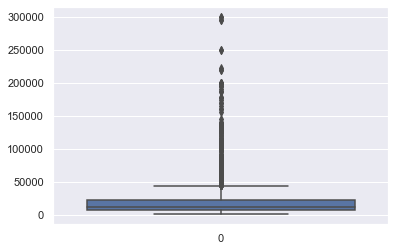

In [12]:
sns.boxplot(data = data_no_mv['Price'])
#Check outliers in data

<AxesSubplot:xlabel='Price', ylabel='Count'>

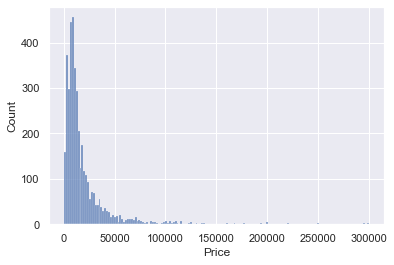

In [13]:
sns.histplot(data_no_mv["Price"])

In [14]:
#Dealing with outliers

q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"] < q]
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Price', ylabel='Count'>

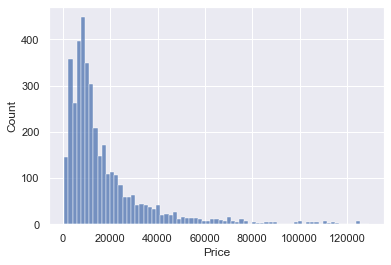

In [15]:
sns.histplot(data_1["Price"])

<AxesSubplot:>

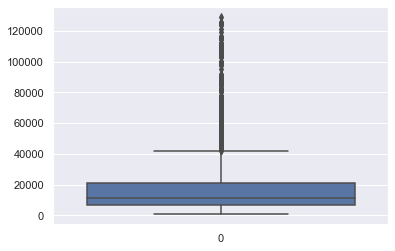

In [16]:
sns.boxplot(data = data_1["Price"])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

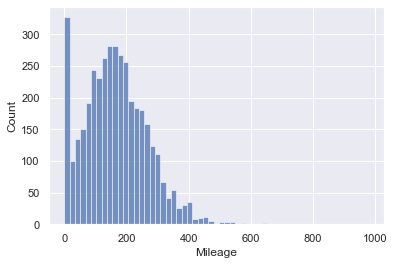

In [17]:
sns.histplot(data_1["Mileage"])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

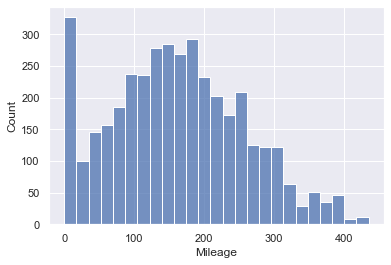

In [20]:
q = data_1["Mileage"].quantile(0.99)
data_1 = data_1[data_1["Mileage"] < q]
sns.histplot(data_1["Mileage"])

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

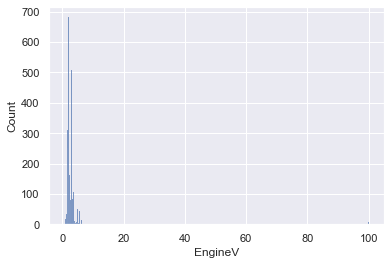

In [21]:
sns.histplot(data_1["EngineV"])

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

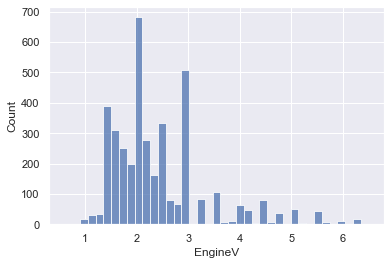

In [22]:
data_2 = data_1[data_1["EngineV"] <= 6.5]
sns.histplot(data_2["EngineV"])

<AxesSubplot:xlabel='Year', ylabel='Count'>

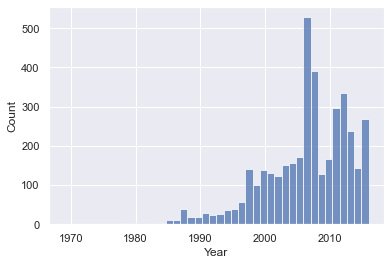

In [23]:
sns.histplot(data_2["Year"])

<AxesSubplot:xlabel='Year', ylabel='Count'>

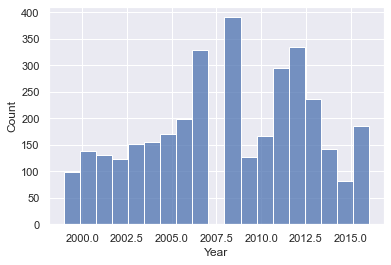

In [24]:
q = data_2["Year"].quantile(0.1)
data_3 = data_2[data_2["Year"] > q]
sns.histplot(data_3["Year"])

In [25]:
data_cleaned = data_3.reset_index(drop = True)

In [26]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3460.000000,3460.000000,3460.000000,3460.000000
mean,19802.694757,147.936127,2.465220,2008.148555
std,19541.538728,86.679171,0.974286,4.574514
min,1200.000000,0.000000,0.600000,1999.000000
25%,8400.000000,85.000000,1.800000,2005.000000
50%,12850.000000,148.000000,2.200000,2008.000000
75%,23500.000000,205.000000,3.000000,2012.000000
max,129222.000000,427.000000,6.500000,2016.000000


# Checking the OLS assumptions

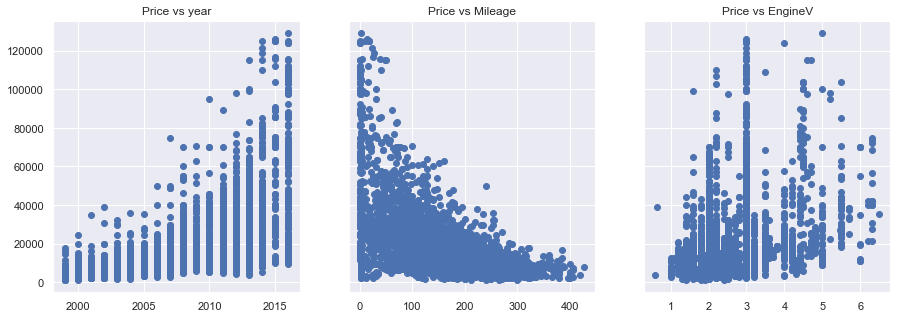

In [27]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,5))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Price vs year")
ax2.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax2.set_title("Price vs Mileage")
ax3.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax3.set_title("Price vs EngineV")

plt.show()

In [28]:
# Relaxing the assumption
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_Price"] = log_price

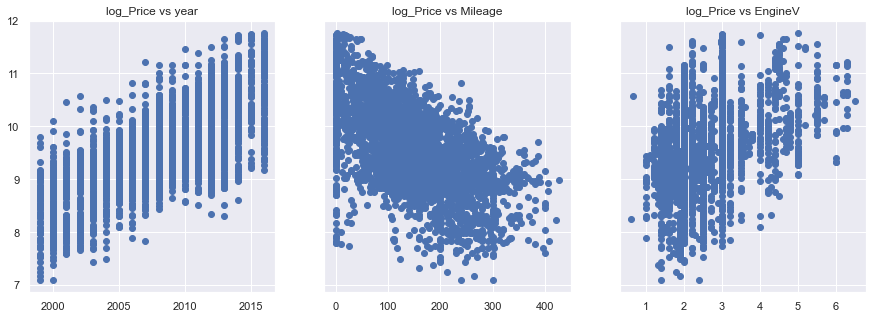

In [29]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,5))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_Price"])
ax1.set_title("log_Price vs year")
ax2.scatter(data_cleaned["Mileage"], data_cleaned["log_Price"])
ax2.set_title("log_Price vs Mileage")
ax3.scatter(data_cleaned["EngineV"], data_cleaned["log_Price"])
ax3.set_title("log_Price vs EngineV")

plt.show()

In [30]:
data_cleaned = data_cleaned.drop(["Price"],axis =1)

In [31]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_Price'], dtype=object)

# Multicollinearilty

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [34]:
vif

,VIF,features
0,3.892790,Mileage
1,10.110043,Year
2,7.400148,EngineV


In [35]:
# VIF = 1 : no multicollinearity
# 1< VIF < 5 :perfectly okay
# VIF > 5 : it's depends

data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3455,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3456,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3457,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3458,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Create dummy Variables

In [36]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_with_dummies

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3456,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3457,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3458,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[data_with_dummies.drop(["log_Price"],axis =1).columns.values]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [40]:
vif

,VIF,features
0,4.681644,Mileage
1,8.254082,EngineV
2,2.233887,Brand_BMW
3,2.957935,Brand_Mercedes-Benz
4,1.723587,Brand_Mitsubishi
5,2.241766,Brand_Renault
6,2.333036,Brand_Toyota
7,2.964906,Brand_Volkswagen
8,1.435246,Body_hatch
9,1.523533,Body_other


In [41]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
cols = ['log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [43]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head(5)

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Linear Regression model

In [45]:
# input
target = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'],axis=1)

In [46]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [47]:
inputs_scaled = scaler.transform(inputs)

In [48]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target,test_size=0.3,random_state=365)

In [49]:
# Create the Regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [50]:
y_hat = reg.predict(x_train)

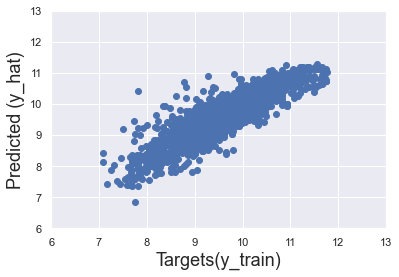

In [51]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)', size = 18)
plt.ylabel('Predicted (y_hat)',size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

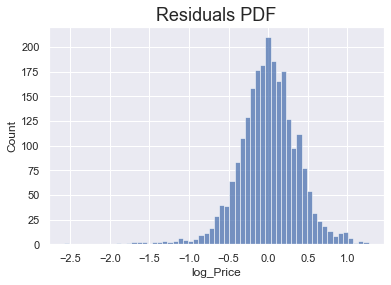

In [54]:
sns.histplot(y_train-y_hat)
plt.title("Residuals PDF",size = 18)

In [55]:
reg.score(x_train,y_train)

0.7931302375121443

In [56]:
reg_summary = pd.DataFrame(inputs.columns.values,columns = ["Features"])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.428955
1,EngineV,0.209190
2,Brand_BMW,0.038691
3,Brand_Mercedes-Benz,0.014695
4,Brand_Mitsubishi,-0.155956
5,Brand_Renault,-0.208489
6,Brand_Toyota,-0.076849
7,Brand_Volkswagen,-0.089144
8,Body_hatch,-0.122298
9,Body_other,-0.101779


# Testing

In [57]:
y_hat_test = reg.predict(x_test)

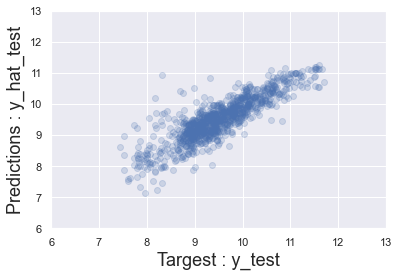

In [61]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targest : y_test',size =18)
plt.ylabel('Predictions : y_hat_test',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [64]:
df_pf = pd.DataFrame(np.exp(y_hat_test).round(3),columns=["Prediction"])
df_pf

,Prediction
0,12691.144
1,53684.511
2,20959.281
3,7090.662
4,15950.765
...,...
1033,10732.582
1034,2855.955
1035,14958.595
1036,19655.688


In [65]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,12691.144,NaN
1,53684.511,13300.0
2,20959.281,NaN
3,7090.662,NaN
4,15950.765,14200.0


In [67]:
 y_test = y_test.reset_index(drop =True)

In [68]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,12691.144,8999.0
1,53684.511,99999.0
2,20959.281,26000.0
3,7090.662,7700.0
4,15950.765,16500.0


In [69]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]
df_pf["Difference %"] = np.absolute((df_pf["Residual"]/df_pf["Target"])*100)
df_pf.head()

,Prediction,Target,Residual,Difference %
0,12691.144,8999.0,-3692.144,41.028381
1,53684.511,99999.0,46314.489,46.314952
2,20959.281,26000.0,5040.719,19.387381
3,7090.662,7700.0,609.338,7.913481
4,15950.765,16500.0,549.235,3.328697


In [70]:
df_pf.describe()

,Prediction,Target,Residual,Difference %
count,1038.000000,1038.000000,1038.000000,1038.000000
mean,17197.360271,18454.996214,1257.635943,34.280774
std,12873.624907,17818.408551,9393.264623,61.347502
min,1257.673000,1700.000000,-51777.556000,0.049615
25%,8802.926250,8000.000000,-2670.677750,11.374959
50%,13212.038500,12500.000000,77.872000,23.607901
75%,21296.600000,21875.000000,3240.464250,38.040216
max,75712.475000,121500.000000,76862.482000,1262.867220
